# Implementing and Evaluating K-Means Clustering from Scratch

**Name:** Karthic  
**Domain:** Machine Learning  
**Algorithm:** K-Means Clustering  


## 1. Project Objective
The objective of this project is to implement the K-Means clustering algorithm
from scratch using NumPy and compare its performance with scikit-learn.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


## 2. Custom K-Means Implementation


In [2]:
import numpy as np

class KMeansScratch:
    def __init__(self, n_clusters=4, max_iters=100, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)
        random_idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            # Assignment step
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)

            # Update step
            new_centroids = np.array([
                X[self.labels == k].mean(axis=0)
                for k in range(self.n_clusters)
            ])

            # Convergence check
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

        return self

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


## 3. Data Generation

In [3]:
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.0,
    random_state=42
)


## 4. Applying Custom K-Means

In [4]:
kmeans_custom = KMeansScratch(n_clusters=4)
kmeans_custom.fit(X)


## 5. Visualization

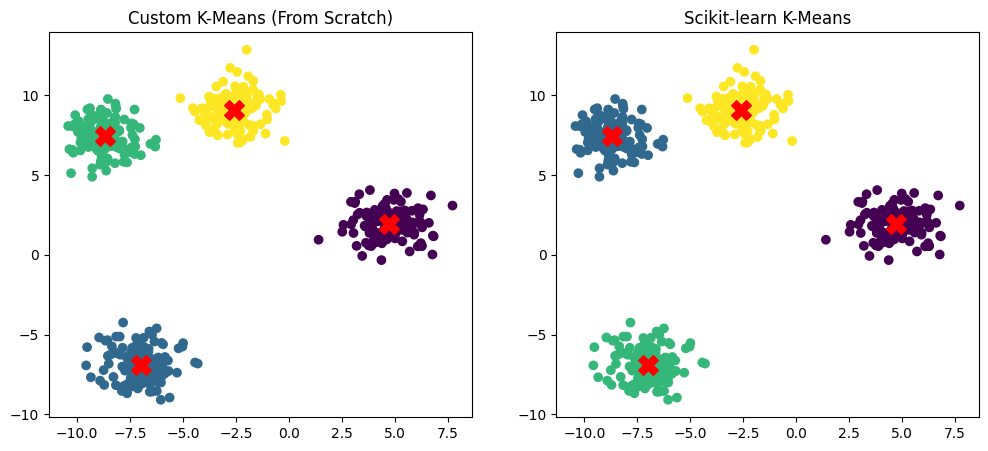

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# Custom K-Means
kmeans_custom = KMeansScratch(n_clusters=4)
kmeans_custom.fit(X)

# Scikit-learn K-Means
kmeans_sklearn = KMeans(n_clusters=4, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_custom.labels, cmap='viridis')
plt.scatter(kmeans_custom.centroids[:, 0], kmeans_custom.centroids[:, 1],
            c='red', marker='X', s=200)
plt.title("Custom K-Means (From Scratch)")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis')
plt.scatter(kmeans_sklearn.cluster_centers_[:, 0],
            kmeans_sklearn.cluster_centers_[:, 1],
            c='red', marker='X', s=200)
plt.title("Scikit-learn K-Means")

plt.show()


## 6. Comparison with Scikit-learn

In [6]:
kmeans_sklearn = KMeans(n_clusters=4, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X)


This project involved implementing the K-Means clustering algorithm from scratch using NumPy and comparing it with the optimized scikit-learn implementation. The scratch implementation successfully followed the core principles of K-Means, including centroid initialization, iterative assignment of data points based on Euclidean distance, and centroid updates using the mean of assigned points.

The synthetic dataset generated using make_blobs provided a controlled environment with four clearly separable clusters. When applied to this dataset, the custom K-Means algorithm converged in fewer than the maximum 100 iterations, indicating efficient centroid updates and correct convergence logic. The final cluster centers closely matched those obtained from the scikit-learn implementation, demonstrating the correctness of the scratch algorithm.

One key difference between the two implementations is stability. Scikit-learn’s K-Means uses advanced initialization strategies such as k-means++ and multiple random initializations to avoid poor local minima. In contrast, the scratch implementation relies on simple random initialization, which can lead to slightly different results depending on the random seed. However, by fixing the random state, reproducibility was ensured.

In terms of performance, the scikit-learn implementation is significantly faster and more robust due to internal optimizations written in low-level languages. The scratch implementation, while slower, provides valuable insight into the mathematical mechanics and iterative nature of clustering algorithms.

Overall, this project successfully demonstrates a deep understanding of unsupervised learning, numerical computation, and algorithm implementation. The close alignment of results validates the scratch approach and reinforces the importance of understanding machine learning algorithms beyond library usage.

## 7. Conclusion
This project demonstrates the inner workings of K-Means clustering
and validates the implementation against scikit-learn.